In [1]:
!pip install dill

In [2]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
import pickle
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
# loading the data into the dataframe
df = pd.read_csv('data2.csv')
print(df)

       year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  TEMP  \
0      2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0  -2.3   
1      2013      3    1     1    4.0   4.0  3.0  10.2   100.0  92.0  -2.7   
2      2013      3    1     2    4.0   4.0  3.4   3.6   100.0  91.0  -3.2   
3      2013      3    1     3    3.0   3.0  3.0   2.0   220.0  71.0  -3.3   
4      2013      3    1     4    3.0   3.0  7.0  10.8   300.0  86.0  -4.1   
...     ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   ...   
34038  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   9.9   
34039  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   9.5   
34040  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   8.4   
34041  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   8.3   
34042  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   6.7   

         PRES  DEWP  RAIN  WSPM  
0      1020.3 -20.7   0.0   3.1  
1      

In [4]:
# viewing info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34043 entries, 0 to 34042
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    34043 non-null  int64  
 1   month   34043 non-null  int64  
 2   day     34043 non-null  int64  
 3   hour    34043 non-null  int64  
 4   PM2.5   34043 non-null  float64
 5   PM10    34043 non-null  float64
 6   SO2     34043 non-null  float64
 7   NO2     34043 non-null  float64
 8   CO      34043 non-null  float64
 9   O3      34043 non-null  float64
 10  TEMP    34043 non-null  float64
 11  PRES    34043 non-null  float64
 12  DEWP    34043 non-null  float64
 13  RAIN    34043 non-null  float64
 14  WSPM    34043 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 3.9 MB


In [5]:
#viewing few rows from the top
df.head()

year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    7.0   7.0  3.0   2.0  100.0  91.0  -2.3  1020.3   
1  2013      3    1     1    4.0   4.0  3.0  10.2  100.0  92.0  -2.7  1020.8   
2  2013      3    1     2    4.0   4.0  3.4   3.6  100.0  91.0  -3.2  1020.6   
3  2013      3    1     3    3.0   3.0  3.0   2.0  220.0  71.0  -3.3  1021.3   
4  2013      3    1     4    3.0   3.0  7.0  10.8  300.0  86.0  -4.1  1022.1   

   DEWP  RAIN  WSPM  
0 -20.7   0.0   3.1  
1 -20.5   0.0   1.5  
2 -21.4   0.0   1.8  
3 -23.7   0.0   2.4  
4 -22.7   0.0   2.2

In [6]:
#number of rows and columns in the dataset
print(df.shape)

(34043, 15)


In [7]:
#statistical information about columns
print(df.describe())

               year         month           day          hour         PM2.5  \
count  34043.000000  34043.000000  34043.000000  34043.000000  34043.000000   
mean    2014.659431      6.520459     15.752754     11.460565     62.598490   
std        1.177899      3.415254      8.803266      6.904784     55.926391   
min     2013.000000      1.000000      1.000000      0.000000      2.000000   
25%     2014.000000      4.000000      8.000000      5.000000     17.000000   
50%     2015.000000      7.000000     16.000000     11.000000     46.000000   
75%     2016.000000      9.000000     23.000000     17.000000     94.000000   
max     2017.000000     12.000000     31.000000     23.000000    247.000000   

               PM10           SO2           NO2            CO            O3  \
count  34043.000000  34043.000000  34043.000000  34043.000000  34043.000000   
mean      84.337908     11.407071     30.884721    944.647957     60.422094   
std       70.476256     17.540075     23.874924    

In [8]:
#checking how many null values are in each column
df.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

Just doing `df.dropna()` drops all the NaN values only for the current execution of the cell. If you do the above `df.isnull().sum()` now, you can see that null values still persists. You can solve this by assigning the obtained output of
`df.dopna()` to the variable `df` which stores our data (dataframe)

In [9]:
# dropping all the rows with NaN values
df = df.dropna()

In [10]:
#defining training and testing data
x_train = df[:24136]
y_train = x_train['PM2.5']
x_test = df[24136:34043]
y_test = x_test['PM2.5']
print(y_test)

24136    72.0
24137    74.0
24138    75.0
24139    81.0
24140    79.0
         ... 
34038    16.0
34039    21.0
34040    17.0
34041    11.0
34042    11.0
Name: PM2.5, Length: 9907, dtype: float64


There are many pollutants. Let's first try to predict PM2.5 concentration values. Let the years 2016 and 2017 be the testing set. As you can see below, these 2 years account for 21.9% of the data (test set)

In [11]:
df.loc[24865:34043].count() / df.shape[0] * 100

year     26.960021
month    26.960021
day      26.960021
hour     26.960021
PM2.5    26.960021
PM10     26.960021
SO2      26.960021
NO2      26.960021
CO       26.960021
O3       26.960021
TEMP     26.960021
PRES     26.960021
DEWP     26.960021
RAIN     26.960021
WSPM     26.960021
dtype: float64

In [12]:
#Normalizing training data
train_norm = x_train['PM2.5']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.02040816]
[0.00816327]
[0.00816327]
[0.00408163]
[0.00408163]


Even after normalization and scaing, null values are possible (many people disregard this). Let's check if any null values are present.

In [13]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  1


In [14]:
#removing null values
train_norm = train_norm[train_norm!=0]

In [15]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.28571429]
[0.29387755]
[0.29795918]
[0.32244898]
[0.31428571]


In [16]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [17]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [18]:
print(train_norm.shape)
print(test_norm.shape)

(24135,)
(9906,)


Since this is a time series data, we should be predicting the values after looking at a set of values rather than just a single value like we usually do. This takes into account the correlation between the data points and the timestamps. Because the neighbours should be considered for how the values change over time. Let's define a function to do this.

The below function called split_sequence splits the sequence into sets of n values. This n is given as n_steps (step_size). For example, if n=3, we split the sequence in groups of 3. We create 2 empty lists and append the split sequences.

In [19]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

Here the number of features = 1 as we will be predicting a single value. Let's reshape the split sequences into the format of number of rows, number of columns. (shape[0], shape[1]). In the output, we can see that groups of 3 since n_steps = 3 have been obtained.

In [20]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train[i])

[[0.02040816]
 [0.00816327]
 [0.00816327]]
[[0.00816327]
 [0.00816327]
 [0.00408163]]
[[0.00816327]
 [0.00408163]
 [0.00408163]]
[[0.00408163]
 [0.00408163]
 [0.00816327]]
[[0.00408163]
 [0.00816327]
 [0.00408163]]


You can see below that, we predict the value for the first 3 values, then consider that output as one of the 3 values in the next set. For example, we preedict 0.1 first, then we take that 0.1 as input in the second set and so on.

In [21]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.28571429 0.29387755 0.29795918] 0.32244897959183677
[0.29387755 0.29795918 0.32244898] 0.31428571428571433
[0.29795918 0.32244898 0.31428571] 0.3306122448979592
[0.32244898 0.31428571 0.33061224] 0.34693877551020413
[0.31428571 0.33061224 0.34693878] 0.3918367346938776


Let's define our neural network (LSTM: Long Short Term Memory). Let's add 50 nodes in our first layer with a ReLU (Rectified linear unit) activation. Their shape will be step size, number of features. Then we will add, a dense layer with one node for the output.

We can try out different optimizers to see which minimizes loss and maximizes accuracy. Stochastic gradient descent (SGD), Adam, AdaBoost, RMSProp are few of them. lr = learning rate, decay = by how much to decay the learning rate, momentum = how much should the gradient descent be accelerated to dampen oscillations, nesterov = whether to use nesterov momentum. Nesterov has stronger convergence for convex functions. And then we compile using MSE (mean squared loss) as our loss function.

In [22]:
!setx TF_USE_LEGACY_KERAS True


SUCCESS: Specified value was saved.


In [23]:
!pip install tf_keras

In [24]:
# define model
model = Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(units=1))

# Updated parameters: learning_rate instead of lr, and using legacy optimizer
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# If you still want to use decay, you can switch to the legacy optimizer
legacy_sgd = tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

#keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


C:\Users\govin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tf_keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10


755/755 [==============================] - 16s 3ms/step - loss: 0.0104 - accuracy: 4.1439e-04 - val_loss: 0.0048 - val_accuracy: 4.0392e-04
Epoch 2/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0050 - accuracy: 4.5583e-04 - val_loss: 0.0043 - val_accuracy: 4.0392e-04
Epoch 3/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0048 - accuracy: 4.5583e-04 - val_loss: 0.0043 - val_accuracy: 4.0392e-04
Epoch 4/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 4.5583e-04 - val_loss: 0.0041 - val_accuracy: 4.0392e-04
Epoch 5/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 4.5583e-04 - val_loss: 0.0042 - val_accuracy: 4.0392e-04
Epoch 6/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 4.5583e-04 - val_loss: 0.0042 - val_accuracy: 4.0392e-04
Epoch 7/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 4.55

In [26]:
#with open('model.pkl', 'wb') as f:  
 #   pickle.dump(model, f)

In [27]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
actual = model.predict(X_split_test)
for i in range(5):
    print(actual[i])

310/310 [==============================] - 1s 1ms/step
[0.30088508]
[0.3256086]
[0.3163573]
[0.33202654]
[0.34913844]


In [29]:
#mse = mean_squared_error(y_split_test, actual)
#print('MSE: %.5f' % mse)
mse = mean_squared_error(actual,y_split_test)
rmse = np.sqrt(mse)
r2 = r2_score(actual, y_split_test)


print("LSTM - Mean Squared Error:", mse)
print("LSTM - Root Mean Squared Error:", rmse)
print("LSTM - R-squared:", r2)

LSTM - Mean Squared Error: 0.004071239819721287
LSTM - Root Mean Squared Error: 0.0638062678717482
LSTM - R-squared: 0.9004448300793734


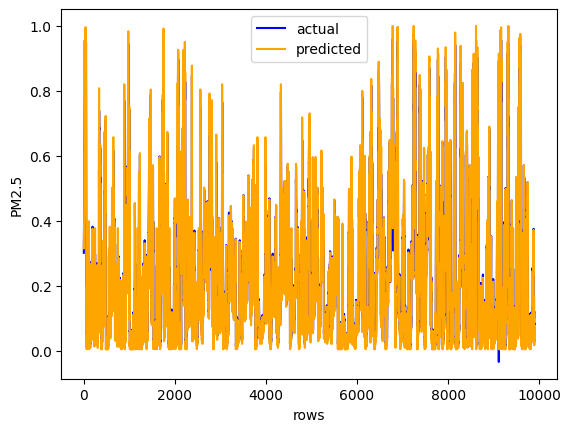

In [30]:
# Plotting the data with different colors
plt.plot(actual, label='actual', color='blue')
plt.plot(y_split_test, label='predicted', color='orange')

# Adding labels and legend
plt.xlabel('rows')
plt.ylabel('PM2.5')
plt.legend()

# Display the plot
plt.show()

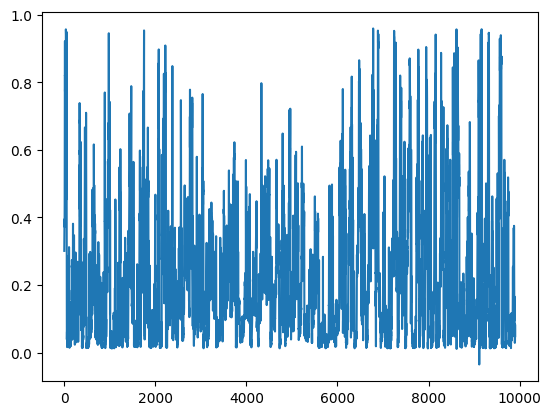

In [31]:
plt.plot(actual)

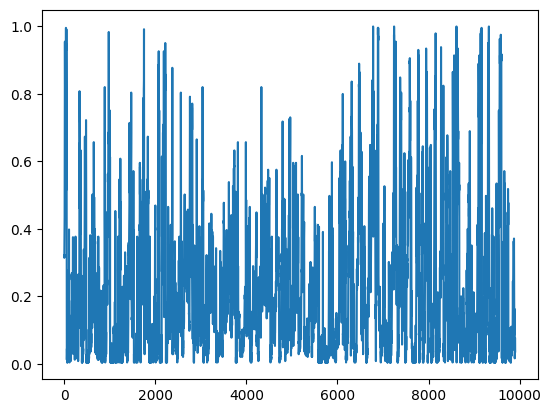

In [32]:
plt.plot(y_split_test)

In [33]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00046, Test: 0.00040


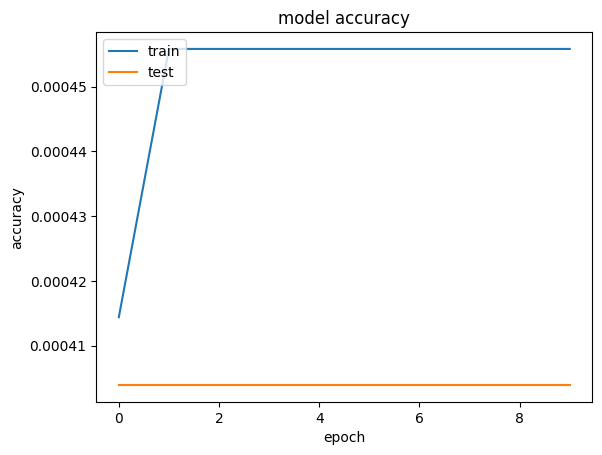

In [34]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

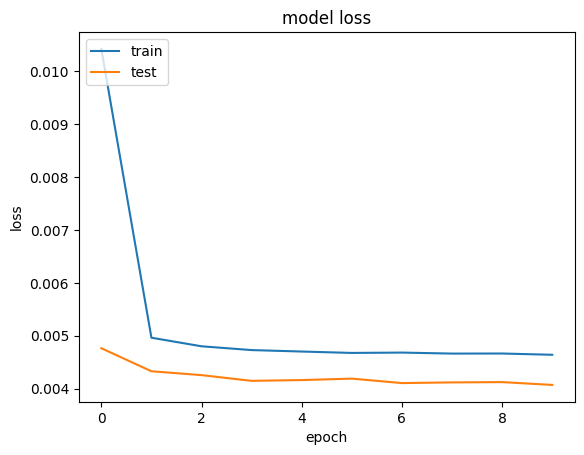

In [35]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Until now, we just ran our model for prediction of a single pollutant. We have 6 pollutants in our dataset and can make predictions for all of them. So, I have made a function which can be used to predict the other pollutants rather than having to write the code again and again. I have commented the function calls. You can fork this kernel to uncomment and predit the other pollutants (Coz it would take up a lot of space and time).

In [36]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e-04 - val_loss: 0.0041 - val_accuracy: 4.0392e-04
Epoch 2/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e-04 - val_loss: 0.0041 - val_accuracy: 4.0392e-04
Epoch 3/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e-04 - val_loss: 0.0040 - val_accuracy: 4.0392e-04
Epoch 4/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e-04 - val_loss: 0.0040 - val_accuracy: 4.0392e-04
Epoch 5/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e-04 - val_loss: 0.0040 - val_accuracy: 4.0392e-04
Epoch 6/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 4.5583e-04 - val_loss: 0.0041 - val_accuracy: 4.0392e-04
Epoch 7/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 4.5583e

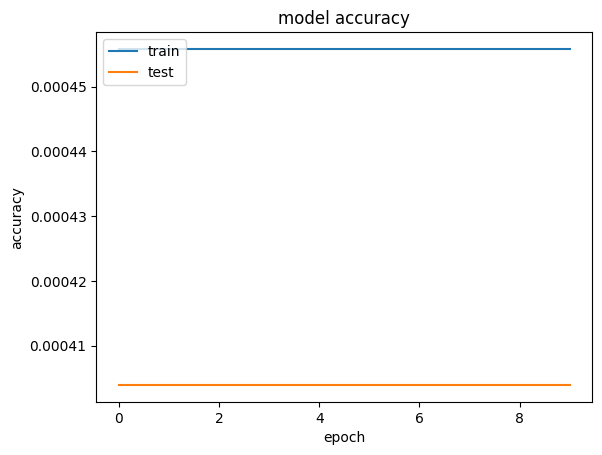

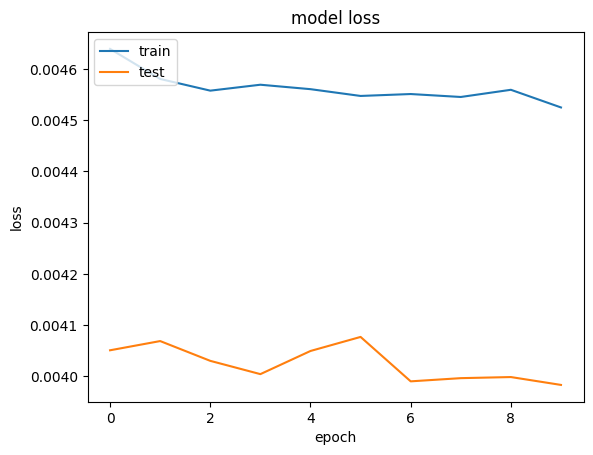

In [42]:
compute('PM2.5')
with open('modelpm25.pkl', 'wb') as f:  
    pickle.dump(model, f)

Epoch 1/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 2/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 3/10
754/754 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 4/10
754/754 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 5/10
754/754 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 6/10
754/754 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.0000e

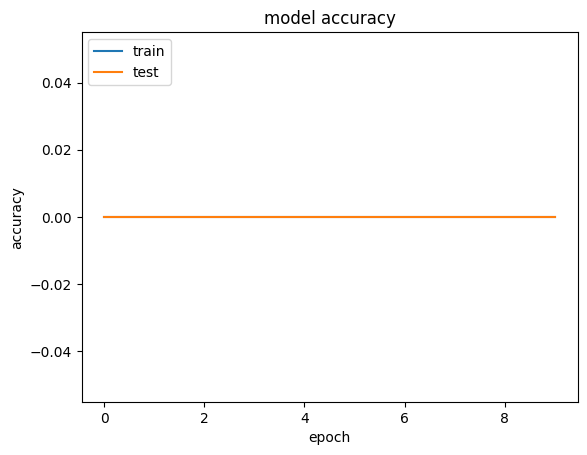

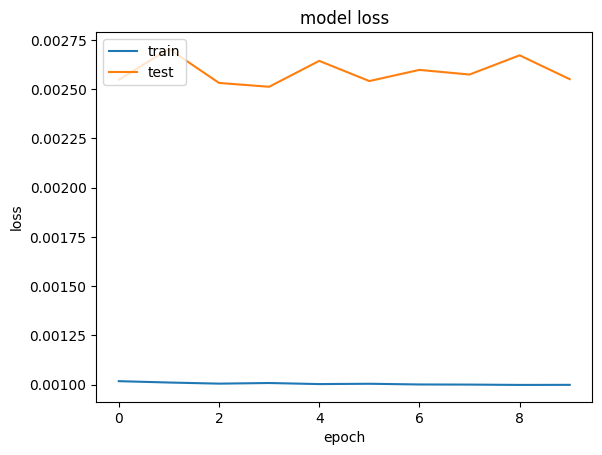

In [38]:
compute('SO2')
with open('modelso2.pkl', 'wb') as f:  
    pickle.dump(model, f)

Epoch 1/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0037 - val_accuracy: 1.0437e-04
Epoch 2/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0036 - val_accuracy: 1.0437e-04
Epoch 3/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0036 - val_accuracy: 1.0437e-04
Epoch 4/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0036 - val_accuracy: 1.0437e-04
Epoch 5/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0036 - val_accuracy: 1.0437e-04
Epoch 6/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e-05 - val_loss: 0.0036 - val_accuracy: 1.0437e-04
Epoch 7/10
755/755 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 4.1440e

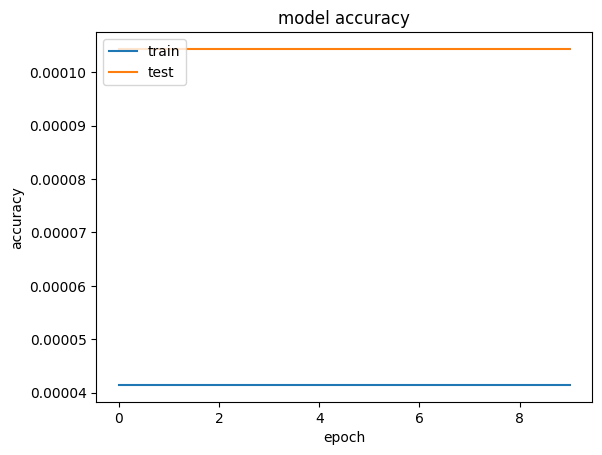

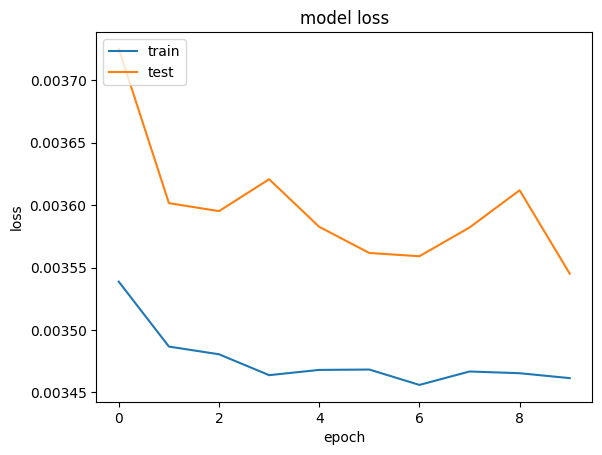

In [39]:
compute('NO2')
with open('modelno2.pkl', 'wb') as f:  
    pickle.dump(model, f)

Epoch 1/10
747/747 [==============================] - 2s 2ms/step - loss: 7.6185e-04 - accuracy: 8.3703e-05 - val_loss: 0.0016 - val_accuracy: 1.0414e-04
Epoch 2/10
747/747 [==============================] - 2s 2ms/step - loss: 7.3883e-04 - accuracy: 8.3703e-05 - val_loss: 0.0016 - val_accuracy: 1.0414e-04
Epoch 3/10
747/747 [==============================] - 2s 2ms/step - loss: 7.3264e-04 - accuracy: 8.3703e-05 - val_loss: 0.0017 - val_accuracy: 1.0414e-04
Epoch 4/10
747/747 [==============================] - 2s 2ms/step - loss: 7.2727e-04 - accuracy: 8.3703e-05 - val_loss: 0.0017 - val_accuracy: 1.0414e-04
Epoch 5/10
747/747 [==============================] - 2s 2ms/step - loss: 7.2197e-04 - accuracy: 8.3703e-05 - val_loss: 0.0016 - val_accuracy: 1.0414e-04
Epoch 6/10
747/747 [==============================] - 2s 2ms/step - loss: 7.2003e-04 - accuracy: 8.3703e-05 - val_loss: 0.0017 - val_accuracy: 1.0414e-04
Epoch 7/10
747/747 [==============================] - 2s 2ms/step - loss: 7.

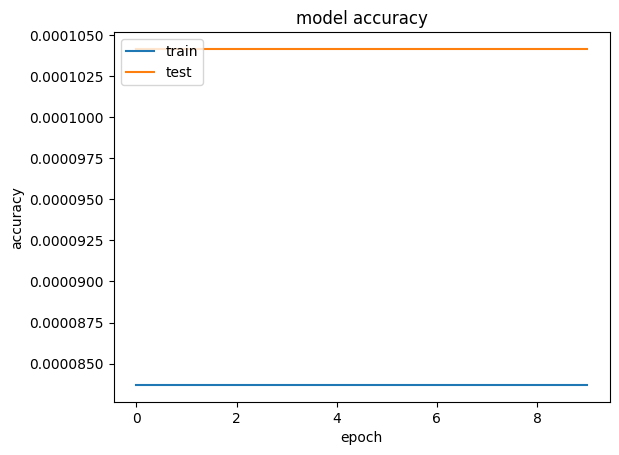

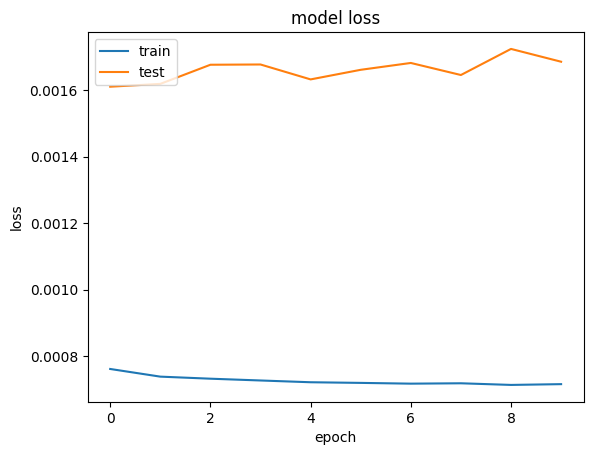

In [40]:
compute('CO')
with open('modelco.pkl', 'wb') as f:  
    pickle.dump(model, f)

Epoch 1/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 1.0107e-04
Epoch 2/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 1.0107e-04
Epoch 3/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 1.0107e-04
Epoch 4/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 1.0107e-04
Epoch 5/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 1.0107e-04
Epoch 6/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 1.0107e-04
Epoch 7/10
754/754 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.0000e

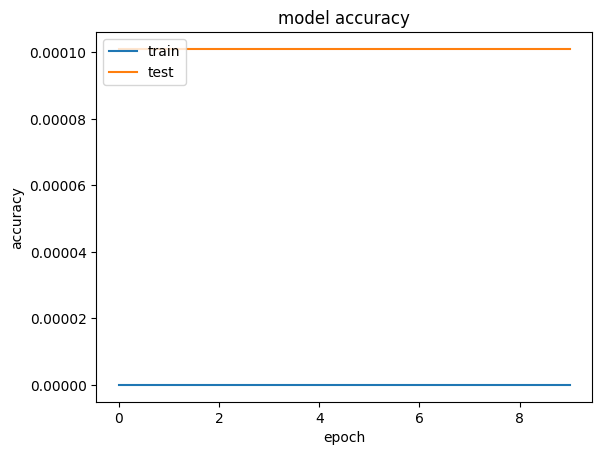

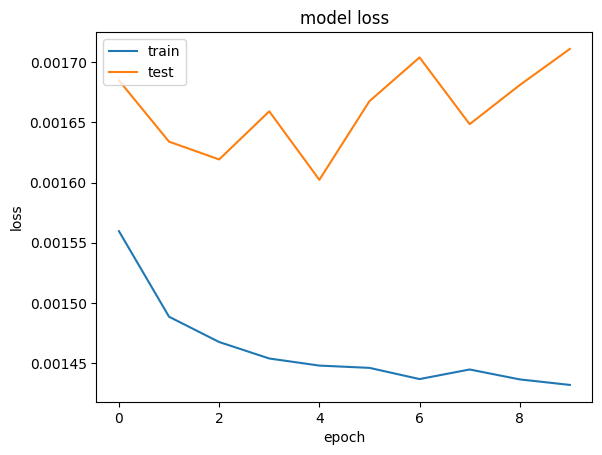

In [41]:
compute('O3')
with open('modelo3.pkl', 'wb') as f:  
    pickle.dump(model, f)

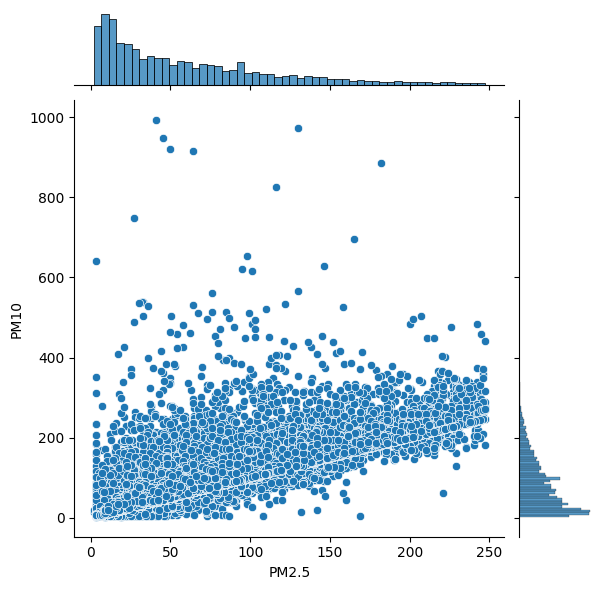

In [185]:
sns.jointplot(x=df['PM2.5'], y=df['PM10'], data = df)

<Axes: >

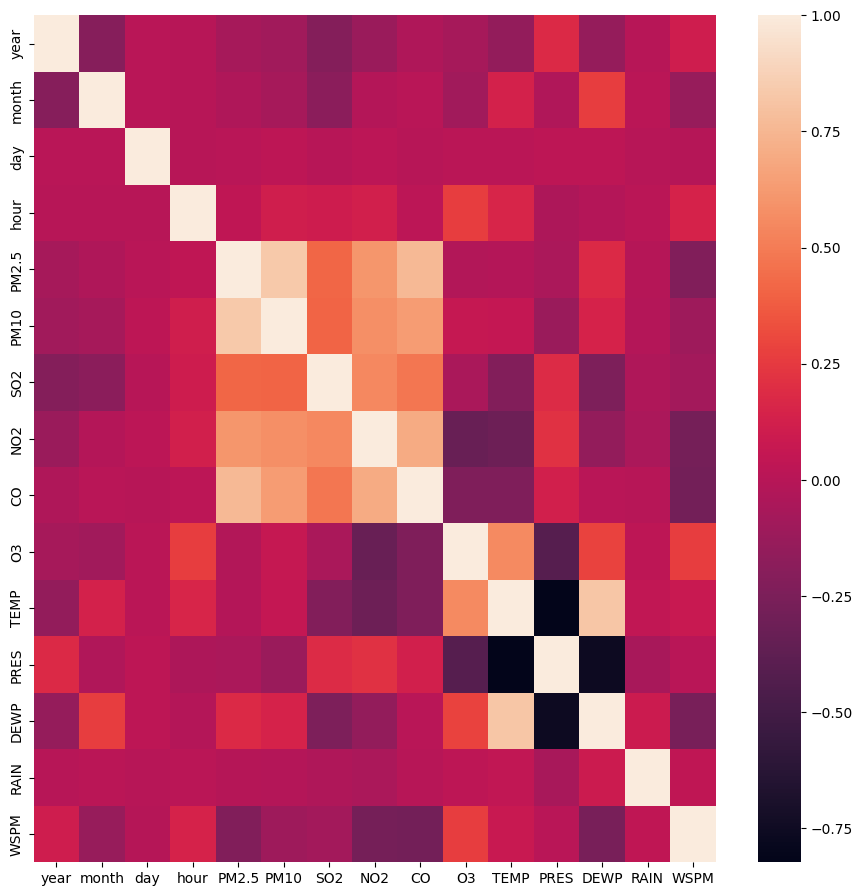

In [186]:
#finding correlation
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)

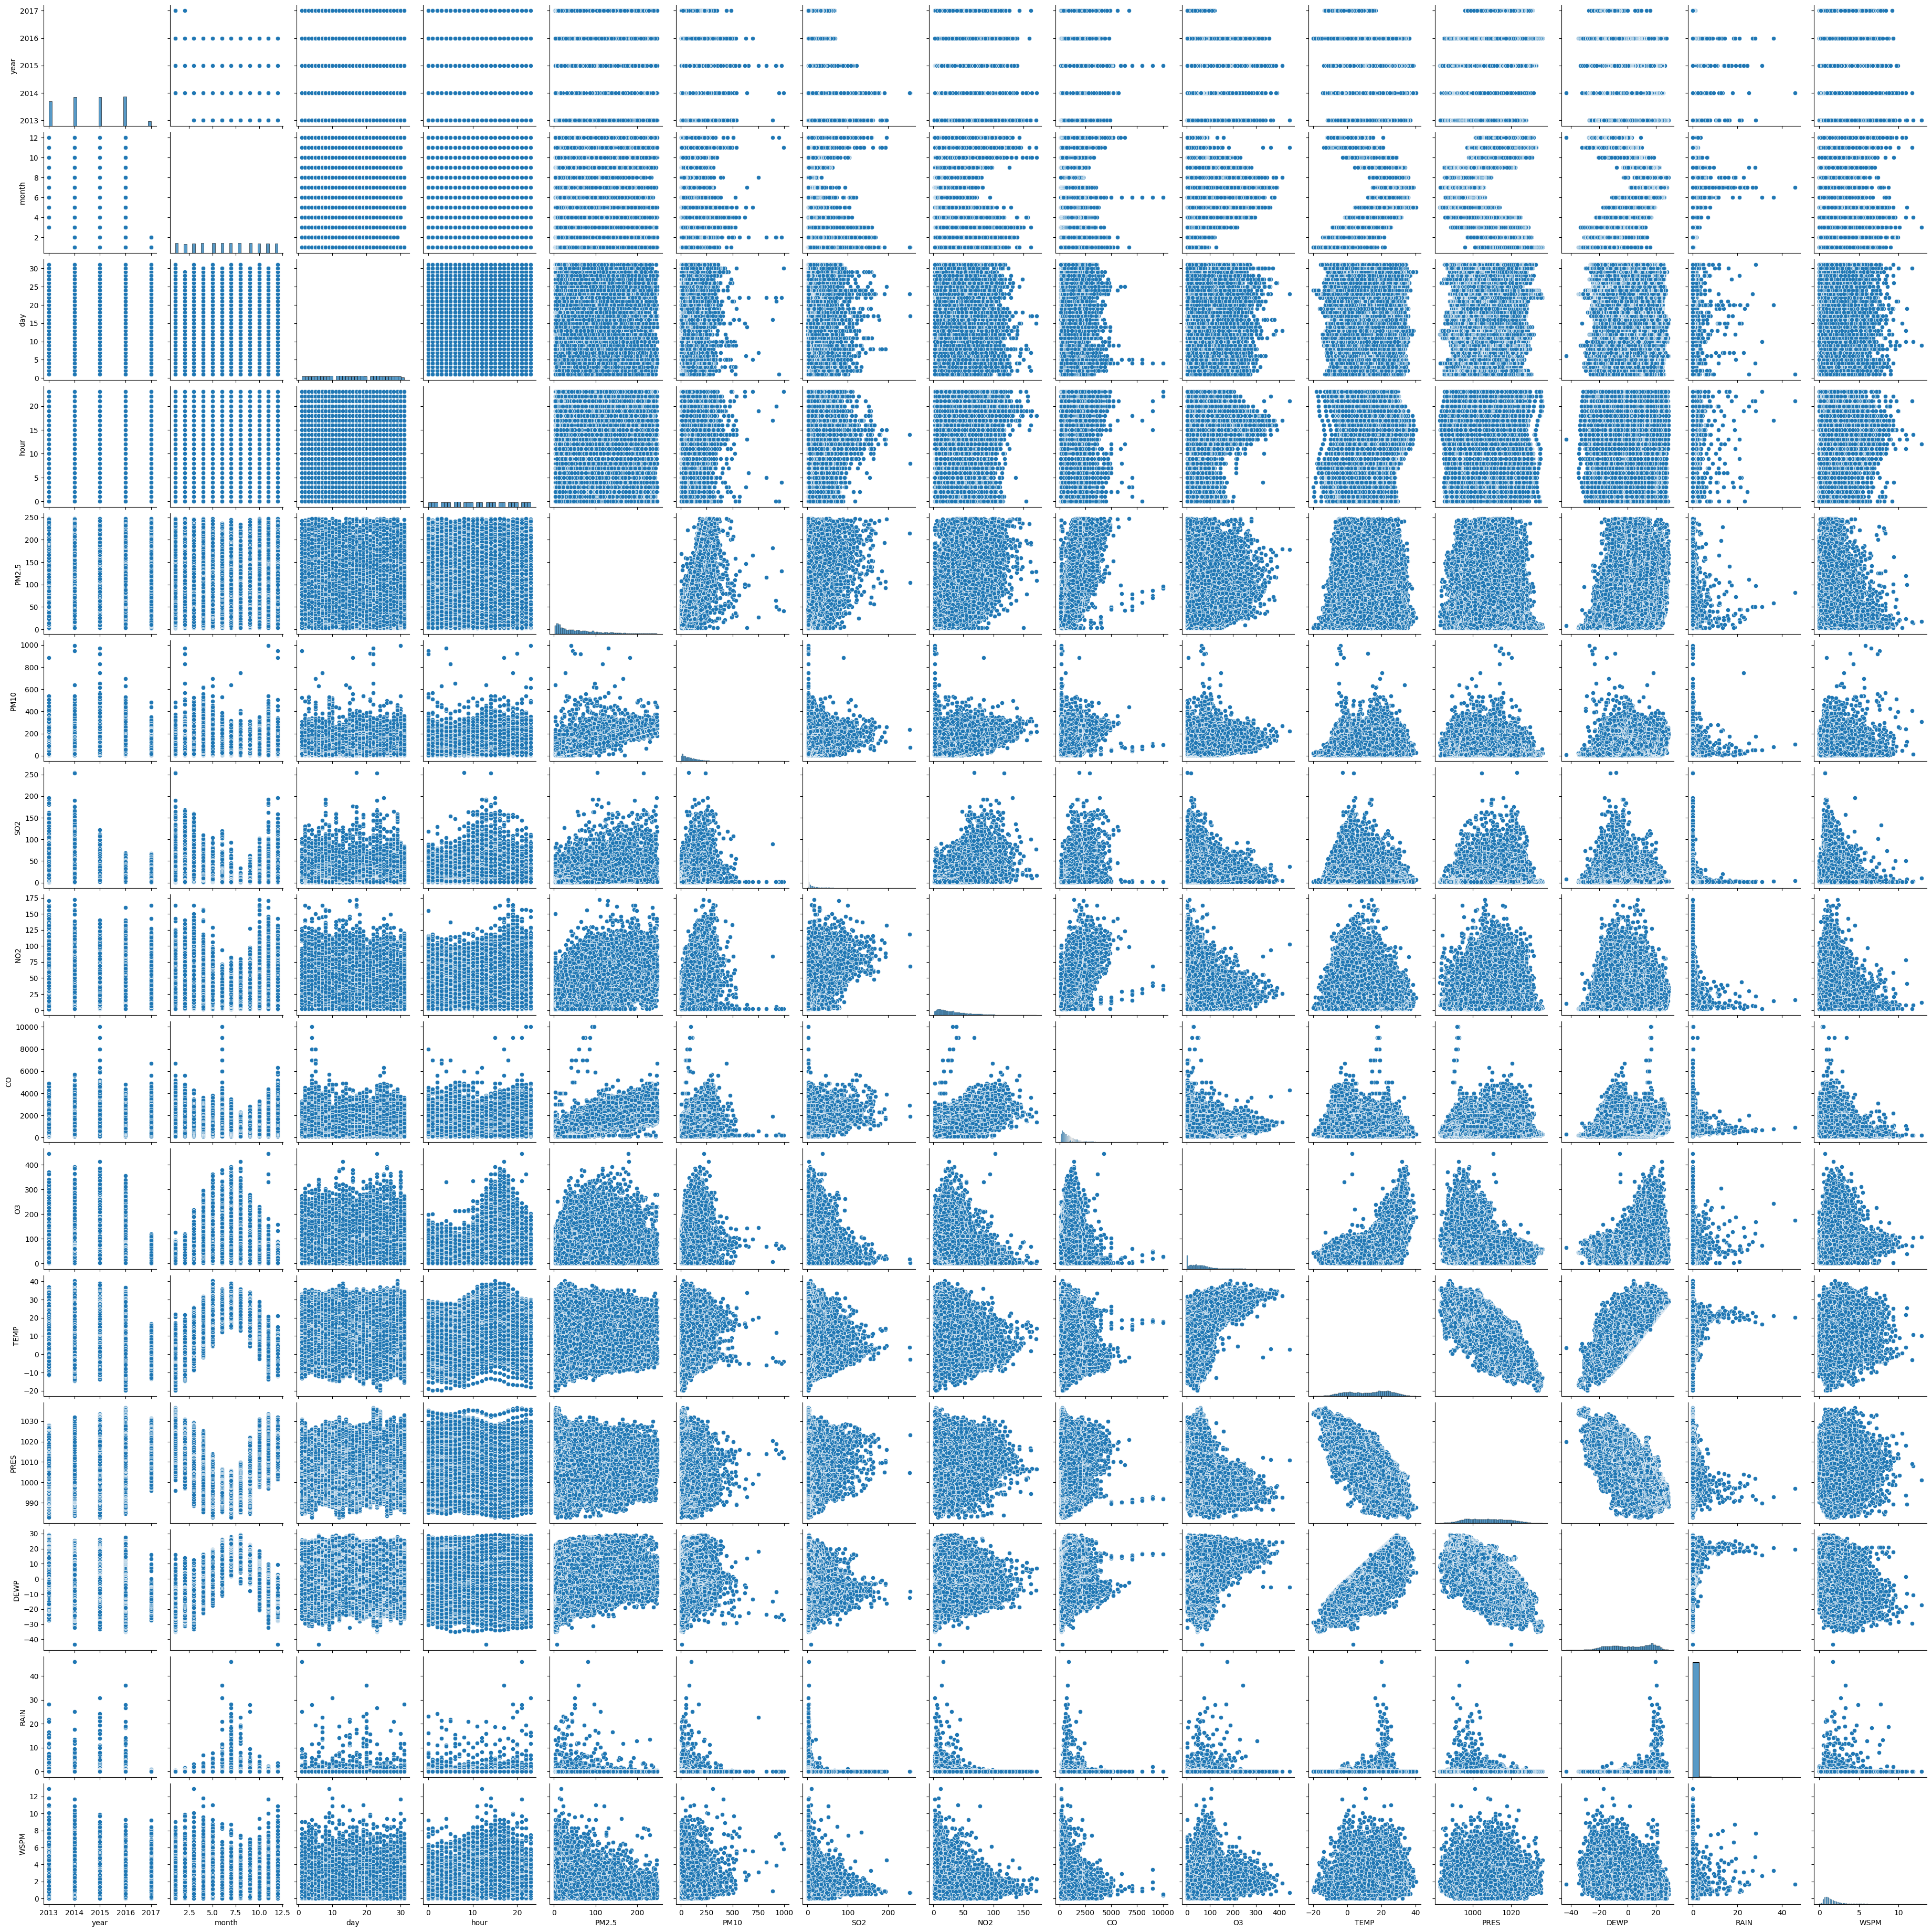

In [187]:
g = sns.pairplot(df)

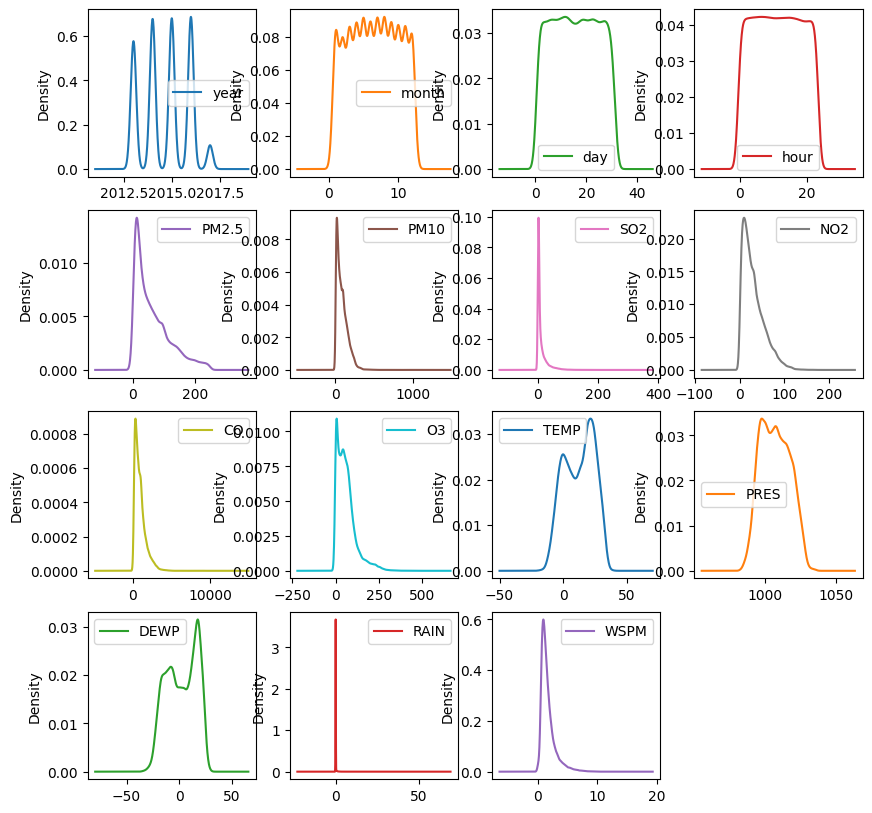

In [188]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

<Axes: xlabel='PM2.5', ylabel='PM10'>

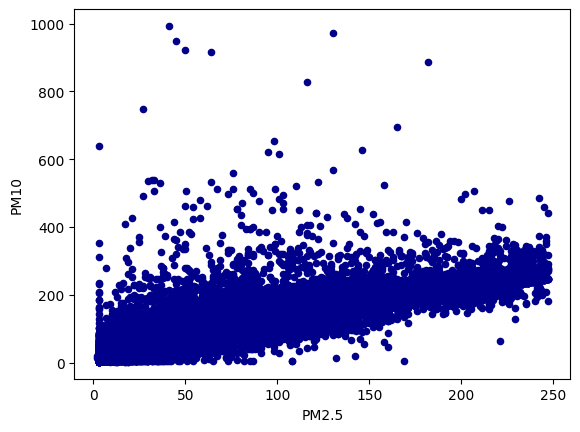

In [189]:
df.plot.scatter(x='PM2.5', y='PM10', c='DarkBlue')

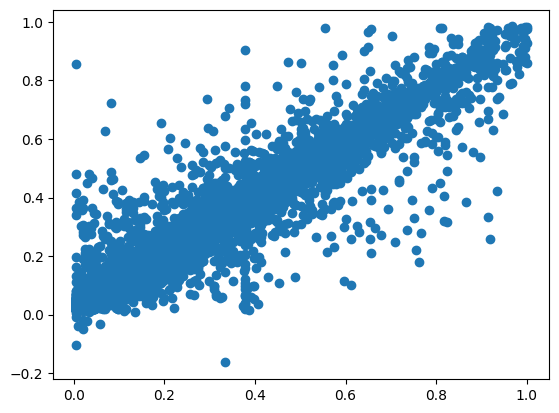

In [190]:
plt.scatter(y_split_test, actual)

<Axes: xlabel='PM10', ylabel='SO2'>

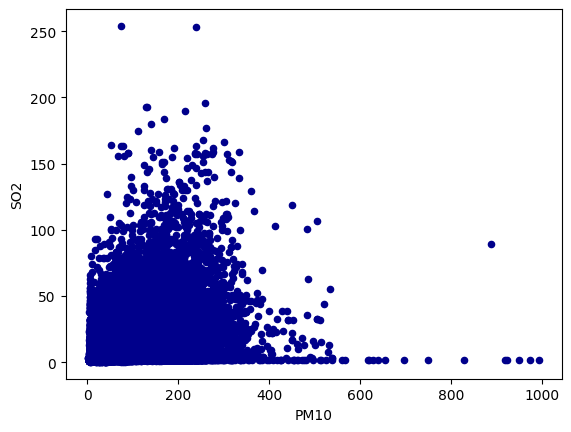

In [191]:
df.plot.scatter(x='PM10', y='SO2', c='DarkBlue')

<Axes: xlabel='SO2', ylabel='NO2'>

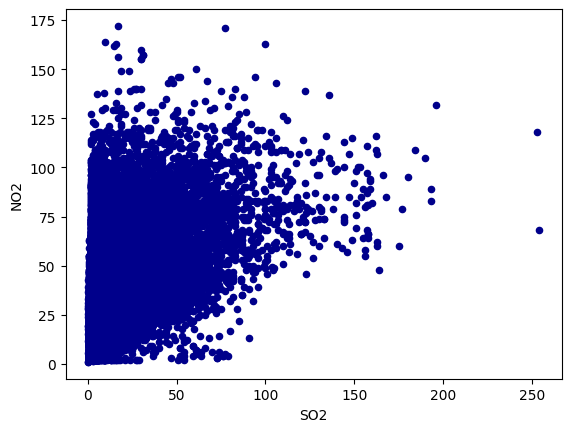

In [192]:
df.plot.scatter(x='SO2', y='NO2', c='DarkBlue')

<Axes: xlabel='NO2', ylabel='CO'>

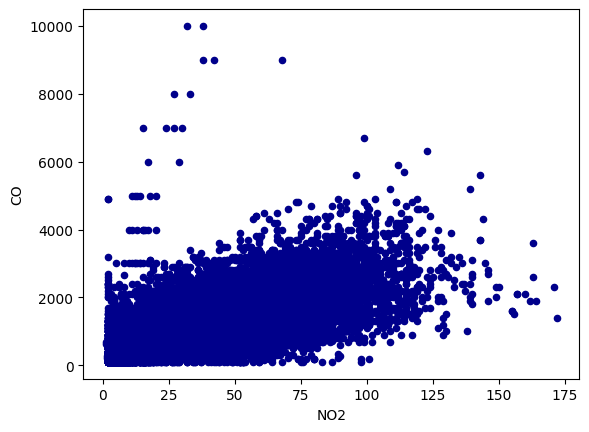

In [193]:
df.plot.scatter(x='NO2', y='CO', c='DarkBlue')

<Axes: xlabel='CO', ylabel='O3'>

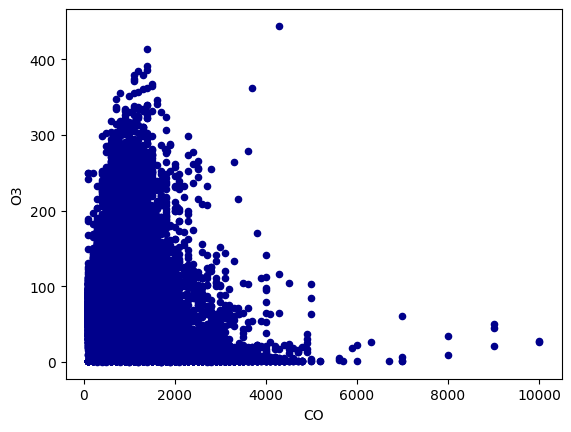

In [194]:
df.plot.scatter(x='CO', y='O3', c='DarkBlue')

Heatmap is a very useful visualization tool to know how much each feature is correlated. vmax = max value of the heatmap fmt = number of decimal places upto which the value is shown square = do you want the heatmap to be square shaped linewidth = width of the lines in the heatmap annot = should the boxes be labelled with the value.

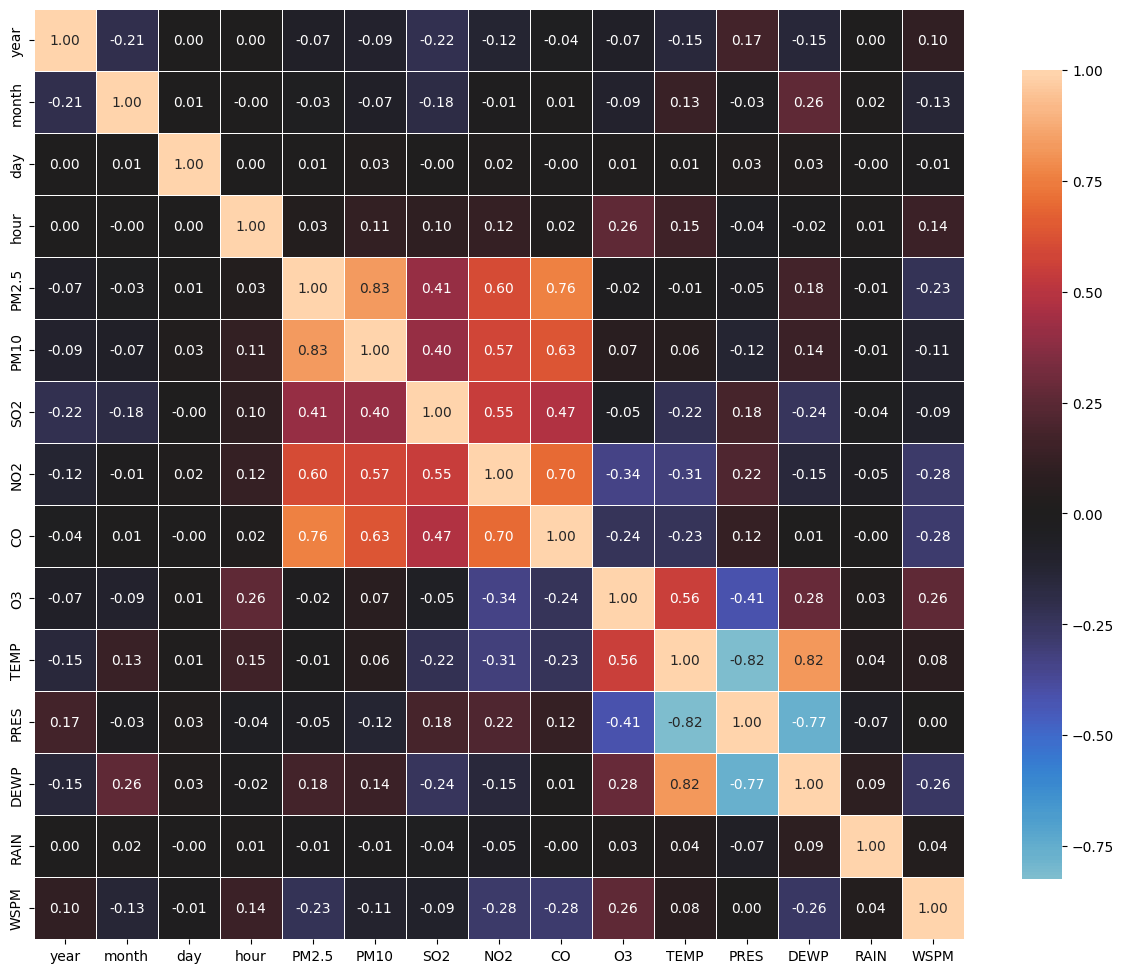

In [195]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

In [196]:
# from keras.models import model_from_json

# # Assuming your model is stored in a variable called 'model'
# model.save('model1.h5')


In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pickle

# Load the saved model
# model = load_model('model1.h5')
# with open('model.pkl', 'wb') as f:  # open a text file
#     pickle.dump(model, f)
# Load your new data for prediction into a DataFrame
# For example:
new_data = pd.read_csv('data2.csv')

# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['CO']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[ 165.70358]
 [ 296.59012]
 [ 371.8551 ]
 ...
 [1112.1622 ]
 [1686.5687 ]
 [ 467.71628]]


In [198]:
import pandas as pd

# Load the existing CSV file
existing_data = pd.read_csv('predictions.csv')

# Assuming 'predictions' contains the output predictions for PM10
# Add the predicted values as a new column 'PM10' to the existing DataFrame
existing_data['CO'] = predictions

# Save the updated DataFrame to the same CSV file
existing_data.to_csv('predictions.csv',index=False)


In [199]:
# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['SO2']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[4.5797086]
 [3.995265 ]
 [9.260353 ]
 ...
 [2.8189137]
 [4.29527  ]
 [2.9933186]]


In [200]:
import pandas as pd

# Load the existing CSV file
existing_data = pd.read_csv('predictions.csv')

# Assuming 'predictions' contains the output predictions for PM10
# Add the predicted values as a new column 'PM10' to the existing DataFrame
existing_data['SO2'] = predictions

# Save the updated DataFrame to the same CSV file
existing_data.to_csv('predictions.csv',index=False)


In [201]:
# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['NO2']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[ 3.8047569]
 [ 3.4345438]
 [13.016108 ]
 ...
 [44.727444 ]
 [30.992096 ]
 [24.602558 ]]


In [202]:
import pandas as pd

# Load the existing CSV file
existing_data = pd.read_csv('predictions.csv')

# Assuming 'predictions' contains the output predictions for PM10
# Add the predicted values as a new column 'PM10' to the existing DataFrame
existing_data['NO2'] = predictions

# Save the updated DataFrame to the same CSV file
existing_data.to_csv('predictions.csv',index=False)


In [203]:
# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['O3']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[88.57566]
 [64.4293 ]
 [89.22419]
 ...
 [53.96519]
 [70.112  ]
 [79.94654]]


In [204]:
import pandas as pd

# Load the existing CSV file
existing_data = pd.read_csv('predictions.csv')

# Assuming 'predictions' contains the output predictions for PM10
# Add the predicted values as a new column 'PM10' to the existing DataFrame
existing_data['O3'] = predictions

# Save the updated DataFrame to the same CSV file
existing_data.to_csv('predictions.csv',index=False)


In [205]:
# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['PM2.5']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[ 5.2503886]
 [ 4.198349 ]
 [ 4.37575  ]
 ...
 [16.206026 ]
 [11.030777 ]
 [11.642253 ]]


In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'predictions' contains the output predictions

# Convert predictions to a DataFrame
df_predictions = pd.DataFrame(predictions, columns=['PM2.5'])

# Save the DataFrame to a CSV file
df_predictions.to_csv('predictions.csv',index=False)

In [207]:
# Preprocess the new data (similar to how you preprocessed your training data)
# Assuming 'PM2.5' is the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_norm = scaler.fit_transform(new_data[['PM10']])  # Assuming 'PM2.5' is the target variable

# Prepare the new data for prediction (similar to how you prepared your training data)
n_steps = 3  # Assuming you used 3 steps in your training data
n_features = 1
X_new = []
for i in range(len(new_data_norm) - n_steps + 1):
    X_new.append(new_data_norm[i:i+n_steps, 0])
X_new = np.array(X_new)
X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], n_features))

# Make predictions using the loaded model
predictions = model.predict(X_new)

# Reverse the scaling on the predictions to get the actual values
predictions = scaler.inverse_transform(predictions)

# Assuming 'PM2.5' is the target variable, you can now use 'predictions' for your analysis
print(predictions)


1064/1064 [==============================] - 1s 1ms/step
[[10.101817]
 [ 9.111753]
 [ 9.282364]
 ...
 [36.741985]
 [31.453312]
 [21.821737]]


In [208]:
import pandas as pd

# Load the existing CSV file
existing_data = pd.read_csv('predictions.csv')

# Assuming 'predictions' contains the output predictions for PM10
# Add the predicted values as a new column 'PM10' to the existing DataFrame
existing_data['PM10'] = predictions

# Save the updated DataFrame to the same CSV file
existing_data.to_csv('predictions.csv',index=False)


In [209]:
import pandas as pd
dfr = pd.read_csv('predictions.csv')

In [210]:
def calculate_AQI(row):
    individual_indices = [row['PM2.5'], row['PM10'], row['CO'], row['SO2'], row['NO2'], row['O3']]
    print(individual_indices)
    high_individual_index = max(individual_indices)

    low_aqi_value = 0
    high_aqi_value = 500
    low_range = 0
    high_range = 500

    aqi = ((high_individual_index - low_aqi_value) / (high_aqi_value - low_aqi_value)) * (high_range - low_range) + low_range

    return aqi

# Assuming 'df' is your DataFrame with individual pollutant indices
# Make sure the columns 'PM2.5i', 'PM10i', 'SO2i', 'NO2i', 'COi', 'O3i' are present in the DataFrame

# Applying the function to create a new column 'AQI' in the DataFrame
dfr['AQI'] = dfr.apply(calculate_AQI, axis=1)

# Displaying the DataFrame with the calculated AQI
print(dfr[['PM2.5', 'PM10', 'CO', 'SO2', 'NO2' , 'O3', 'AQI']])
dfr.head(200)


KeyError: 'CO'